In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

In [2]:
birth_death = gs.ReactionModel(
    
                                species= {
                                            'protein': 0,
                                            'division': 0
                                            },

                                propensities= {
                                                'kr': 100, 
                                                'gamma':10
                                                },

                                reactions= {
                                            'translation':['kr'], 
                                            'degradation':['gamma', 'protein']
                                            },

                                q= {
                                    'translation': {'create': ['protein']}, 
                                    'degradation': {'destroy': ['protein']}
                                    }
                                    )

In [11]:
positive_feedback = gs.Gillespie(tmax=10, sampling_time = 0.01,reaction_model = birth_death, model_name='positive_feedback', cells=1)
positive_feedback.simulate()

100%|██████████| 1/1 [00:00<00:00,  6.93it/s]


In [12]:
df = pd.read_csv('positive_feedback.csv', delimiter='|')
df.head()

,protein,division,time,cell
0,12,0,0.00,1
1,11,0,0.01,1
2,10,0,0.02,1
3,10,0,0.03,1
4,10,0,0.04,1


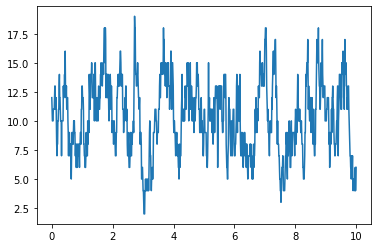

In [13]:
plt.plot(df.time, df.protein)

In [6]:
repressilator = gs.ReactionModel(
                                species = {
                                                'tetR': 550,
                                                'lacI': 1600,
                                                'alphacl': 1000,
                                                'GFP': 100
                                                },

                                propensities = {
                                                'kd_tetR': 0.02,
                                                'kd_lacI': 0.02,
                                                'kd_alphacl': 0.02,
                                                'kc_GFP': 0.05,
                                                'kd_GFP': 1/100000
                                                },
                                
                                reactions = {
                                                'PdtetR':       ['kd_tetR', 'alphacl'],
                                                'PdlacI':       ['kd_lacI', 'tetR'],
                                                'Pdalphacl':    ['kd_alphacl', 'lacI'],
                                                'GFP_cre' :     ['kc_GFP', 'lacI'],
                                                'GFP_des':      ['kd_GFP', 'tetR', 'GFP']
                                                },
                                
                                q = {
                                        'PdtetR':       {'create': ['lacI'],    'destroy': ['tetR']},
                                        'PdlacI':       {'create': ['alphacl'], 'destroy': ['lacI']},
                                        'Pdalphacl':    {'create': ['tetR'],    'destroy': ['alphacl']},
                                        'GFP_cre':      {'create': ['GFP']},
                                        'GFP_des':      {'destroy': ['GFP']}
                                        }
                                )


In [7]:
repre = gs.Gillespie(tmax=1000, sampling_time = 0.1,reaction_model = repressilator, model_name='repre', cells=1)
repre.simulate()

100%|██████████| 1/1 [00:10<00:00, 10.39s/it]


In [8]:
df = pd.read_csv('repre.csv', delimiter='|')
df.head()

,tetR,lacI,alphacl,GFP,time,cell
0,550,1600,1000,100,0.0,1
1,552,1600,998,102,0.1,1
2,554,1600,996,106,0.2,1
3,553,1604,993,117,0.3,1
4,552,1604,994,121,0.4,1


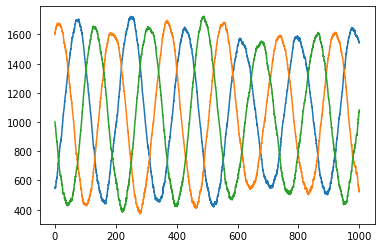

In [9]:
plt.plot(df.time, df.tetR)
plt.plot(df.time, df.lacI)
plt.plot(df.time, df.alphacl)

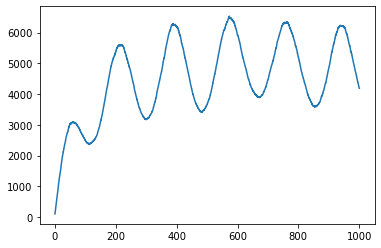

In [10]:
plt.plot(df.time, df.GFP)